# **5003HW6**

**Author: Li,Qichao**

**ID:20787264**

**2021,Nov**

## Part 1: Simulation of the Asset Exchange Model

### (a) Simulate the asset exchange model

In [1]:
import time 
import numpy as np 
from random import seed
from random import random 
from random import sample 
import math 
import matplotlib.pyplot as plt
start_time = time.time()
# seed(5003)


ex = -0.7
print("exponent of the saving factor = ",ex)

#Number of agents:
n = 1000
print("Number if agents = ",n)

#Number of iterations:
iter = 5000
print("Number of iterations = ",iter)

#Number of samples:
nsample = 5
print("Number of samples = ", nsample)

#Initialize the saving factors and wealth of the agents:
wlin = [] 
wlog = []
for isample in range(nsample):
    save = [random()**(1/(ex+1)) for k in range(n)]
    wealth = np.array([1. for k in range(n)])
    
# Pair up the agents for transactions:

    for it in range(iter):
        pair = sample(range(n),n)
        for k in range(0,n,2):
            ran = random()
            gain = ran*((1 - save[pair[k]])*wealth[pair[k]]+(1 - save[pair[k+1]])*wealth[pair[k+1]])-(1 - save[pair[k]])*wealth[pair[k]]
            wealth[pair[k]] = gain+wealth[pair[k]]
            wealth[pair[k+1]] = -gain+wealth[pair[k+1]]
    wlog.append(np.log10(wealth))
    wlin.append(wealth)
#get the average number of final wealth of each agent to reduce the error.
wlog = sum(wlog)/nsample
wlin = sum(wlin)/nsample
run_time = time.time() - start_time
print("Run time:",run_time)

exponent of the saving factor =  -0.7
Number if agents =  1000
Number of iterations =  5000
Number of samples =  5
Run time: 47.26382660865784


In [2]:
#sort the wealth list to find the top20% wealthiest agents among all agents.
wealthiest_20 = sorted(wlin)[-n//5:]

#calcute the percentage of wealth owned by them
wealth_owned_by_20 = round(sum(wealthiest_20)/sum(wlin),3)
print("The percentage of wealth owned by the top 20% agents:",wealth_owned_by_20)

The percentage of wealth owned by the top 20% agents: 0.65


### (b) Check whether the tail distribution obeys the power law. If so, calculate the exponent.

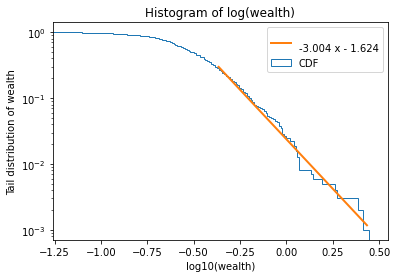

In [13]:
#plot histogram of wealth and show it in a CDF way.
fig,ax = plt.subplots(figsize = (6,4))
ax.set_title("Histogram of log(wealth)")
ax.set_xlabel("log10(wealth)")
ax.set_ylabel("Tail distribution of wealth")
CDF_bins = ax.hist(wlog,density = 1, cumulative = -1,histtype = 'step',
                   log = True,bins =200,label = "CDF")
CDF = CDF_bins[0]
bins = CDF_bins[1]

#find the intervals where the curve seems to be straight.(power law)
bin_choice = bins[120:-1]
CDF_choice = np.log10(CDF[120:])

#fitting the plot in power law.
coeff = np.polyfit(bin_choice,CDF_choice,1)
poly = np.poly1d(coeff)
yfit = lambda x : 10**(poly(x))
# print(poly)
#plot the fitting line
ax.plot(bin_choice,yfit(bin_choice),lw = 2,label = f"{poly}")
ax.set_xlim(-1.26)
plt.legend()
plt.show()

From the CDF histogram and fitting curve above, we prove that the tail distribution truly obey the power law. We calculate the exponent to be $-3.004$ according to the fitting result. 

### (c) Average number of agents whose wealth is doubled.

In [5]:
#use the power law distribution we fit to calculate p(m>2)
print("the probability of having doubled wealth:",round(10**(poly(np.log10(2))),3))

the probability of having doubled wealth: 0.003


When we compare agents' wealth with those agents  whose wealth is doubled, the average number of agents will be reduced by a factor of $0.3\%$.

### (d) Check whether the tail distribution obeys the exponental law (among the less wealthy agents). If so, calculate the exponential function.

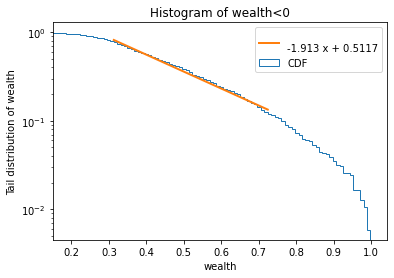

In [14]:
#plot histogram of log(wealth)<1 and show it in a CDF way.
fig,ax = plt.subplots(figsize = (6,4))
ax.set_title("Histogram of wealth<0")
ax.set_xlabel("wealth")
ax.set_ylabel("Tail distribution of wealth")
wlin_poor = [i for i in wlin if i<1]
CDF_bins = ax.hist(wlin_poor,density = 1, cumulative = -1,histtype = 'step',log = True,bins =100,label = "CDF")
CDF = CDF_bins[0]
bins = CDF_bins[1]

#find the intervals where the curve seems to be straight.(exponential law)
bin_choice = bins[25:-30]
CDF_choice = np.log10(CDF[25:-29])

#fitting the plot in exponential law.
coeff = np.polyfit(bin_choice,CDF_choice,1)
poly = np.poly1d(coeff)
yfit = lambda x : 10**(poly(x))
# print(poly)
# plot the fitting line
ax.plot(bin_choice,yfit(bin_choice),lw = 2,label = f"{poly}")
ax.set_xlim(0.15)
plt.legend()
plt.show()

From the CDF histogram and fitting curve above, we prove that the tail distribution truly obey the exponential law. The exponential function:
\begin{align*}
    p(X>m) = 10^{(-1.913m+0.5117)}\\
\end{align*}

### (e) Average number of agents whose wealth is more than half.

In [15]:
#calculate p(m>0.5) according to our fitting result
#notice that since p(m>1) is quite small, here we just ignore it influence.
print("The probabiliy of having more than 0.5 times average wealth of the market:",round(10**(poly(0.5)),3))

The probabiliy of having more than 0.5 times average wealth of the market: 0.359


When we compare agents’ wealth with those agents whose wealth is higher by 0.5 times the average wealth of the market, the average number of agents will be reduced by a factor of $35.9\%$

### (f) Calculate the percentage of wealth owned by the wealthiest 20% of the agents in your model.

In [16]:
#sort the wealth list to find the top20% wealthiest agents among all agents.
wealthiest_20 = sorted(wlin)[-n//5:]

#calcute the percentage of wealth owned by them
wealth_owned_by_20 = round(sum(wealthiest_20)/sum(wlin),3)
print("The percentage of wealth owned by the top 20% agents:",wealth_owned_by_20)

The percentage of wealth owned by the top 20% agents: 0.65


The wealthiest 20% of the agents in my model own $65\%$ of the whole market wealth.

## Part 2: Simulation of the Minority Game

### (1) Outputs for 1 sample with N = 101

#### 1. set the basic parameters

In [2]:
import numpy as np
from random import random
from random import seed
from random import choice
from random import sample

# define the number of agents
N = 101
print("the number of agents N = ",N)

# define the number of memory we check before each transaction.
m = 3
print("the number of memory m = ",m)

# define the number of strategies each time compare
s = 2
print("the number of strategies s = ",s)

# calculate the number of input states
P = 2**m

# define a function to transfer a number into a strategy: 1(buy),0(sell)
def num_to_list(n):
    re = []
    for i in range(P):
        re.append(n%2)
        n = n//2
    return re
# create all strategies for all agents:
all_strategy = np.array([[num_to_list(choice([i for i in range(2**P)])) for j in range(s)] for k in range(N)])

the number of agents N =  101
the number of memory m =  3
the number of strategies s =  2


#### 2. initialize all the states

In [98]:
# initialize the virtual scores of all Ns strategies to 0
Virtual_scores = [[0 for j in range(s)] for i in range(N)]

# initialize the real scores of all N agents to 0
Real_scores = [[0] for i in range(N)]

# initialize the input state at t = 0
Input_state = choice([i for i in range(P)])

# randomly choose the strategy choices of all N agents at t = 0
strategy_choices = [choice([i for i in range(s)]) for _ in range(N)]

#### 3. do the simulation

In [99]:
# define the iteration steps
iterations = 1000
print("the number of iteration steps:",iterations)
buyers_number = []
# do trading for "iterations" times 
for ite in range(iterations):
# calculate the number of buyers(1)
    buyers = sum([1 for i in range(N) if all_strategy[i][strategy_choices[i]][Input_state] == 1])
    buyers_number.append(buyers)
# calculate the excess demand
    A = (buyers - (N-buyers))/N

# choose the winner: if more buyers, sellers win, else buyers win
    win = -1
    if A>0:
        win = 0
    else:
        win = 1
#     print(win)
# update the real scores
    for i in range(N): 
#         if all_strategy[i][strategy_choices[i]][Input_state] == win:
#             Real_scores[i].append(Real_scores[i][-1]+abs(A))
#         else:
#             Real_scores[i].append(Real_scores[i][-1]-abs(A))
#             Real_scores[i].append(Real_scores[i][-1])
        new = Real_scores[i][-1]-A*(2*all_strategy[i][strategy_choices[i]][Input_state]-1)
        Real_scores[i].append(new)
        
            
# update the virtual scores
        
        for j in range(s):
            Virtual_scores[i][j] -= A*(2*all_strategy[i][j][Input_state]-1)
#             if all_strategy[i][j][Input_state] == win:
#                 Virtual_scores[i][j] = Virtual_scores[i][j]+abs(A)
#             else:
#                 Virtual_scores[i][j] = Virtual_scores[i][j]-abs(A)
                
# update the state of the game
#     Input_state = (Input_state-(2**(m-1))*(Input_state//(2**(m-1))))*2+win
    Input_state = (2*Input_state + win)%P

# update the strategy choices of all agents: each agent chooses the 
# strategy with the highest virtual score of 2 random chosen strategies
    
    for i in range(N):
        jchoice = 0
        maxv = Virtual_scores[i][0]
        for j in range(s):
            if Virtual_scores[i][j]>maxv:
                jchoice = j
                maxv = Virtual_scores[i][j]
            elif Virtual_scores[i][j] == maxv:
                if choice([0,1]) == 1:
                    jchoice = j
        strategy_choices[i] = jchoice

the number of iteration steps: 1000


#### 4. Plot the number of buyers vs time

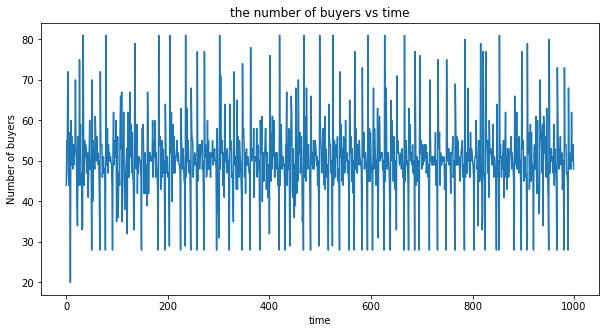

In [100]:
import matplotlib.pyplot as plt
time = [i for i in range(iterations)]
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(time,buyers_number)
ax.set_title("the number of buyers vs time")
ax.set_xlabel("time")
ax.set_ylabel("Number of buyers")
plt.show()
# plt.plot([i for i in range(len(Real_scores[2]))],Real_scores[0])

#### 5. Plot the real scores of the 3 best agents and 3 worst agents

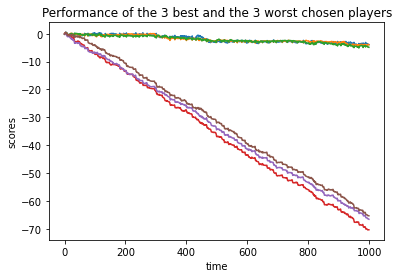

In [102]:
Final_scores = [i[-1] for i in Real_scores]
max_3 = sorted(Final_scores)[::-1][:3]
min_3 = sorted(Final_scores)[::-1][-3:]
First_winner = Real_scores[Final_scores.index(max_3[0])]
Second_winner = Real_scores[Final_scores.index(max_3[1])]
Third_winner = Real_scores[Final_scores.index(max_3[2])]
First_loser = Real_scores[Final_scores.index(min_3[2])]
Second_loser = Real_scores[Final_scores.index(min_3[1])]
Third_loser = Real_scores[Final_scores.index(min_3[0])]
plt.plot(time,First_winner[1:])
plt.plot(time,Second_winner[1:])
plt.plot(time,Third_winner[1:])
plt.plot(time,First_loser[1:],time,Second_loser[1:],time,Third_loser[1:])
plt.title("Performance of the 3 best and the 3 worst chosen players")
plt.xlabel("time")
plt.ylabel("scores")
plt.show()

### (2) Outputs for 10 samples at each value of N for different N

Here, just reuse the code I write in (1) and add a few lines

#### 1. Compute the variance of the number of buyers

In [19]:
# define the number of samples for each N
samples = 10

# define all N we decide to calculate
N_total = [i for i in range(3,102,2)]

# calculate Z
z_total = [2**m/n for n in N_total]

# initialize Var and standard deviation
var_total = []
std_total = []

# do the calculation for each N with "smaples" times
for N in N_total:
    bu = []
    for sam in range(samples):
        all_strategy = np.array([[num_to_list(choice([i for i in range(2**P)])) for j in range(s)] for k in range(N)])
        Virtual_scores = [[0 for j in range(s)] for i in range(N)]
        Real_scores = [[0] for i in range(N)]
        Input_state = choice([i for i in range(P)])
        strategy_choices = [choice([i for i in range(s)]) for _ in range(N)]
        
        buyers_number = []
        for ite in range(iterations):
            buyers = sum([1 for i in range(N) if all_strategy[i][strategy_choices[i]][Input_state] == 1])
            buyers_number.append(buyers)
            A = (buyers - (N-buyers))/N
            if A>0:
                win = 0
            else:
                win = 1
            for i in range(N): 
                new = Real_scores[i][-1]-A*(2*all_strategy[i][strategy_choices[i]][Input_state]-1)
                Real_scores[i].append(new)
                for j in range(s):
                    Virtual_scores[i][j] -= A*(2*all_strategy[i][j][Input_state]-1)
            Input_state = (2*Input_state + win)%P
            for i in range(N):
                jchoice = 0
                maxv = Virtual_scores[i][0]
                for j in range(s):
                    if Virtual_scores[i][j]>maxv:
                        jchoice = j
                        maxv = Virtual_scores[i][j]
                    elif Virtual_scores[i][j] == maxv:
                        if choice([0,1]) == 1:
                            jchoice = j
                strategy_choices[i] = jchoice
# choose the steady state of the date to calculate the variance of number of buyers
        bu.append(np.var(buyers_number[201:]))
# get the average and standard deviation of variance to display the error
    var_total.append(np.mean(bu)/N)
    std_total.append(np.std(bu,ddof = 1)/N)


#### 2. Plot $\dfrac{𝜎^2}{N}$~$\dfrac{2^m}{N}$ using 10 to 20 data points with error bars and find ${z_c}$

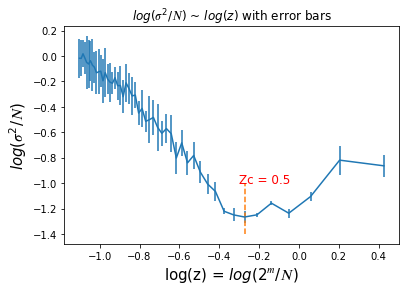

From the plot above, we can clearly find that the minimum of 𝜎^2/𝑁 is located at 2^𝑚/𝑁 = 0.5


In [21]:
import matplotlib.pyplot as plt
plt.errorbar(np.log10(z_total),np.log10(var_total),yerr = std_total)
# plt.errorbar(np.log10(z_total)[::2],np.log10(var_total)[::2],yerr = std_total[::2])
plt.title("$log(𝜎^2/𝑁)$ ~ $log(z)$ with error bars")
plt.xlabel("log(z) = $log(2^𝑚/𝑁)$",fontsize = 15)
plt.ylabel("$log(𝜎^2/𝑁)$",fontsize = 15)

plt.plot([np.log10(z_total[var_total.index(min(var_total))])]*2,[-1.4,-1.0],'--')
plt.text(-0.3,-1.0,"Zc = 0.5",fontsize = 12,color = 'r')
plt.show()
print("From the plot above, we can clearly find that the minimum of 𝜎^2/𝑁 is located at 2^𝑚/𝑁 =",
      round(z_total[var_total.index(min(var_total))],1))
